In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import files
uploaded = files.upload()

Saving cell_samples.csv to cell_samples.csv


In [15]:
cell_df = pd.read_csv("cell_samples.csv")

In [16]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [19]:
cell_df.size

7689

In [20]:
cell_df.shape

(699, 11)

In [22]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [23]:
cell_df["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

Distribution of classes 


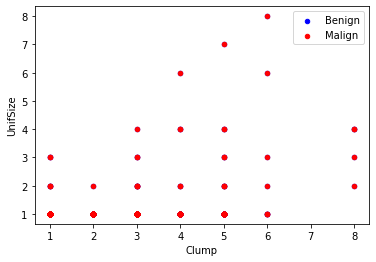

In [36]:
#malignant value is 4
#benign value is 2
benign_df =cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df["Class"]==2][0:200]

axes = benign_df.plot(kind='scatter',x='Clump', y='UnifSize', color='blue',label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red',label='Malign', ax=axes)

In [37]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [43]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]

cell_df['BareNuc']=cell_df['BareNuc'].astype('int')

In [44]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Remove unwanted columns


In [45]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [56]:
feature_df =cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# convert this feature_df to np array for better computation

#x is independent variable here . It has 9 columns out of total 11 initial columns
X =np.asarray(feature_df)

#Dependent variable
y= np.asarray(cell_df['Class'])

In [53]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [57]:
y[0:5]

array([2, 2, 2, 2, 2])

Train and Test data

In [59]:
#cell_df (100 rows)= 80 rows for train and 20 rows for test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=4)

In [63]:
# 546 * 9
X_train.shape

# 546 * 1
y_train.shape

#137*9
X_test.shape

#137*1
y_test.shape

(137,)

Modelling

In [76]:
from sklearn import svm
# svm has multiple packages one of which is SVC - support vector classifier

from sklearn.svm import SVC
classifier =svm.SVC(kernel='linear', gamma='auto', C= 2)

classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [82]:
classifier =SVC(kernel='rbf', gamma= 12, C= 5)
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)

In [81]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.54      0.71        90
           4       0.53      1.00      0.70        47

    accuracy                           0.70       137
   macro avg       0.77      0.77      0.70       137
weighted avg       0.84      0.70      0.70       137

